In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
import numpy as np
import time

In [2]:
## Loading datasets
def load_datasets():
    datasetA, metaA = arff.loadarff(open('R15.arff','r'))
    datasetB, metaB = arff.loadarff(open('cluto-t8-8k.arff','r'))
    datasetC, metaC = arff.loadarff(open('spiralsquare.arff','r'))
    datasetD, metaD = arff.loadarff(open('elly-2d10c13s.arff','r'))
    datasetE, metaE = arff.loadarff(open('cure-t2-4k.arff','r'))
    datasetF, metaF = arff.loadarff(open('square5.arff','r'))
    datasetG, metaG = arff.loadarff(open('rings.arff','r'))
    datasetH, metaH = arff.loadarff(open('disk-1000n.arff','r'))
    
    return ([datasetA, datasetB, datasetC, datasetD, datasetE, datasetF, datasetG, datasetH],[metaA, metaB, metaC, metaD, metaE, metaF, metaG, metaH])

In [6]:
### Find eps for DBSCAN
def dbscan_eps(dataset, nb_min, nb_max, pas, nb_samples):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    dlabels = []

    X = [[x,y] for (x,y,c) in dataset]

    for e in np.arange(nb_min,nb_max,pas):
        start_time = time.time()
        dbscan = DBSCAN(eps=e, min_samples=nb_samples).fit(X)
        elapsed = time.time() - start_time
        labels = dbscan.labels_
        dlabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_eps_sil = sil_score.index(min(sil_score))
    best_eps_db = db_score.index(min(db_score))
    best_eps_chi = chi_score.index(max(chi_score))

    plt.plot(np.arange(nb_min,nb_max,pas),sil_score,label = "silhouette coefficient")
    plt.plot(np.arange(nb_min,nb_max,pas),db_score,label = "DB index")
    plt.xlabel('epsilon')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(np.arange(nb_min,nb_max,pas),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('epsilon')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(np.arange(nb_min,nb_max,pas),duration, label = "Execution time")
    plt.xlabel('epsilon')
    plt.ylabel('time')
    plt.show()
      
    return ((best_eps_sil, best_eps_db, best_eps_chi),dlabels)

In [7]:
### Find min samples for DBSCAN
def dbscan_samples(dataset, nb_min, nb_max, epsilon):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    dlabels = []

    X = [[x,y] for (x,y,c) in dataset]

    for samp in range(nb_min,nb_max):
        start_time = time.time()
        dbscan = DBSCAN(eps=epsilon, min_samples=samp).fit(X)
        elapsed = time.time() - start_time
        labels = dbscan.labels_
        dlabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_samp_sil = sil_score.index(min(sil_score)) + nb_min
    best_samp_db = db_score.index(min(db_score)) + nb_min
    best_samp_chi = chi_score.index(max(chi_score)) + nb_min

    plt.plot(range(nb_min,nb_max),sil_score,label = "silhouette coefficient")
    plt.plot(range(nb_min,nb_max),db_score,label = "DB index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(nb_min,nb_max),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(nb_min,nb_max),duration, label = "Execution time")
    plt.xlabel('min samples')
    plt.ylabel('time')
    plt.show()
      
    return ((best_samp_sil, best_samp_db, best_samp_chi),dlabels)

In [4]:
data, metadata = load_datasets()

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

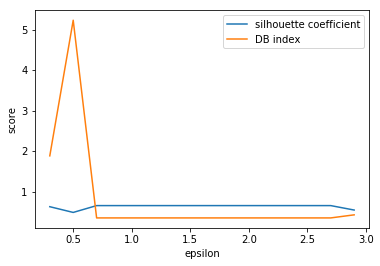

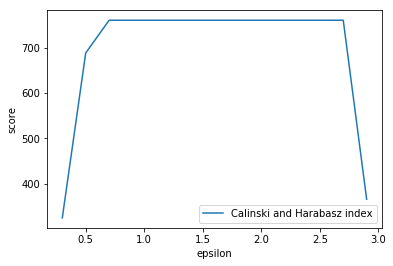

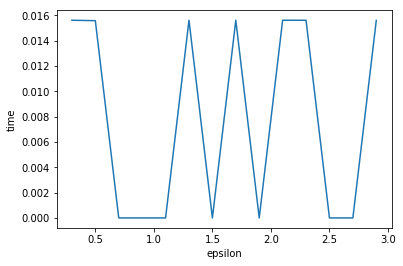

best epsilon with silhouette coefficient:  0.5
best epsilon with DB index:  0.7
best epsilon with Calinski and Harabasz index:  0.7
k with silhouette coefficient: 12
k with DB index: 8
k with Calinski and Harabasz index: 8


In [8]:
min_eps = 0.3
max_eps = 3.0
step_eps = 0.2

samples = 5

((e_sil,e_db,e_chi),labels) = dbscan_eps(data[0],min_eps,max_eps,step_eps,samples)

epsilon_range = np.arange(min_eps,max_eps,step_eps)
print("best epsilon with silhouette coefficient: ", epsilon_range[e_sil])
print("best epsilon with DB index: ", epsilon_range[e_db])
print("best epsilon with Calinski and Harabasz index: ", epsilon_range[e_chi])

best_labels_sil = labels[e_sil]
best_labels_db = labels[e_db]
best_labels_chi = labels[e_chi]

print("k with silhouette coefficient:",np.unique(best_labels_sil).shape[0])
print("k with DB index:",np.unique(best_labels_db).shape[0])
print("k with Calinski and Harabasz index:",np.unique(best_labels_chi).shape[0])

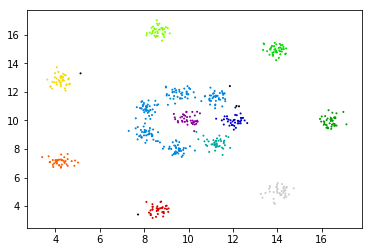

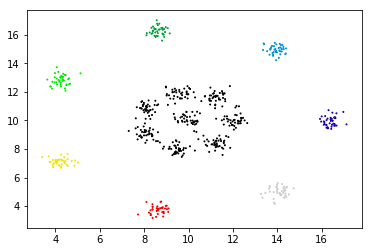

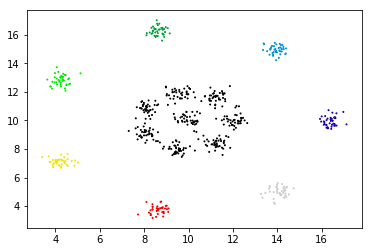

In [10]:
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')
plt.show()

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

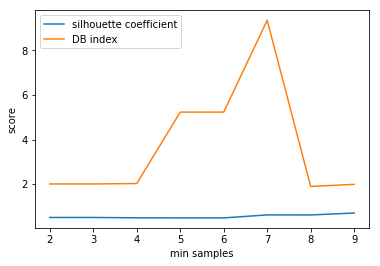

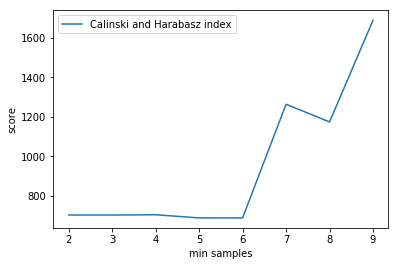

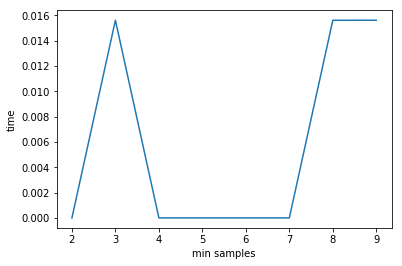

best min samples with silhouette coefficient:  5
best min samples with DB index:  8
best min samples with Calinski and Harabasz index:  9
k with silhouette coefficient: 12
k with DB index: 13
k with Calinski and Harabasz index: 15


In [11]:
best_epsilon = 0.5
min_nb_samples = 2
max_nb_samples = 10

((s_sil,s_db,s_chi),labels) = dbscan_samples(data[0],min_nb_samples,max_nb_samples,best_epsilon)

print("best min samples with silhouette coefficient: ", s_sil)
print("best min samples with DB index: ", s_db)
print("best min samples with Calinski and Harabasz index: ", s_chi)

best_labels_sil = labels[s_sil-min_nb_samples]
best_labels_db = labels[s_db-min_nb_samples]
best_labels_chi = labels[s_chi-min_nb_samples]

print("k with silhouette coefficient:",np.unique(best_labels_sil).shape[0])
print("k with DB index:",np.unique(best_labels_db).shape[0])
print("k with Calinski and Harabasz index:",np.unique(best_labels_chi).shape[0])

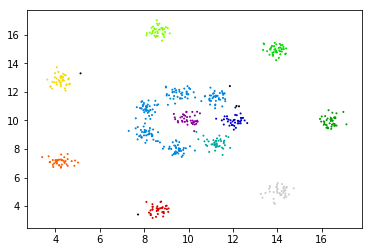

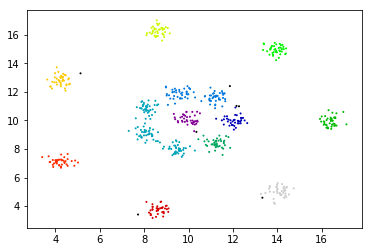

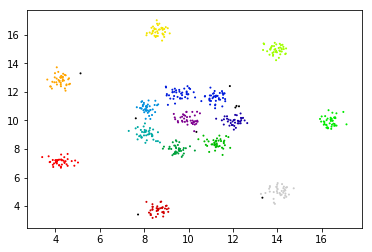

In [12]:
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')
plt.show()

In [21]:
def dbscan_params(dataset, nb_min, nb_max, min_eps,max_eps,step_eps):
    
    s_duration_sil = []
    s_duration_db = []
    s_duration_chi = []
    
    s_sil_score = []
    s_db_score = []
    s_chi_score = []
    
    s_labels_sil = []
    s_labels_db = []
    s_labels_chi = []

    samp_eps_sil = []
    samp_eps_db = []
    samp_eps_chi = []
    
    X = [[x,y] for (x,y,c) in dataset]

    for samp in range(nb_min,nb_max):
        duration = []
        sil_score = []
        db_score = []
        chi_score = []
        dlabels = []

        for e in np.arange(min_eps,max_eps,step_eps):
            start_time = time.time()
            dbscan = DBSCAN(eps=e, min_samples=samp).fit(X)
            elapsed = time.time() - start_time
            labels = dbscan.labels_
            dlabels.append(labels)
            sil = metrics.silhouette_score(X, labels)
            db = metrics.davies_bouldin_score(X, labels)
            chi = metrics.calinski_harabaz_score(X, labels)
            sil_score.append(sil)
            db_score.append(db)
            chi_score.append(chi)
            duration.append(elapsed)

        best_eps_sil = sil_score.index(min(sil_score))
        best_eps_db = db_score.index(min(db_score))
        best_eps_chi = chi_score.index(max(chi_score))
        
        all_eps = np.arange(min_eps,max_eps,step_eps)
        
        samp_eps_sil.append(all_eps[best_eps_sil])
        samp_eps_db.append(all_eps[best_eps_db])
        samp_eps_chi.append(all_eps[best_eps_chi])
        
        s_sil_score.append(sil_score[best_eps_sil])
        s_db_score.append(db_score[best_eps_db])
        s_chi_score.append(chi_score[best_eps_chi])
        
        s_duration_sil.append(duration[best_eps_sil])
        s_duration_db.append(duration[best_eps_db])
        s_duration_chi.append(duration[best_eps_chi])

        s_labels_sil.append(dlabels[best_eps_sil])
        s_labels_db.append(dlabels[best_eps_db])
        s_labels_chi.append(dlabels[best_eps_chi])

    best_samp_sil = s_sil_score.index(min(s_sil_score)) + nb_min
    best_samp_db = s_db_score.index(min(s_db_score)) + nb_min
    best_samp_chi = s_chi_score.index(max(s_chi_score)) + nb_min
    
    best_eps_sil = samp_eps_sil[best_samp_sil-nb_min]
    best_eps_db = samp_eps_db[best_samp_db-nb_min]
    best_eps_chi = samp_eps_chi[best_samp_chi-nb_min]

    print("best with silhouette coefficient: eps=", samp_eps_sil[best_samp_sil-nb_min],"min_samples=", best_samp_sil)
    print("best with DB index: eps=",samp_eps_db[best_samp_db-nb_min],"min_samples=", best_samp_db)
    print("best with Calinski and Harabasz index: eps=",samp_eps_chi[best_samp_chi-nb_min],"min_samples=", best_samp_chi)

    plt.plot(range(nb_min,nb_max),s_sil_score,label = "silhouette coefficient")
    plt.plot(range(nb_min,nb_max),s_db_score,label = "DB index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(nb_min,nb_max),s_chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(nb_min,nb_max),s_duration_sil,label = "Execution time - silhouette coefficient")
    plt.plot(range(nb_min,nb_max),s_duration_db,label = "Execution time - DB index")
    plt.plot(range(nb_min,nb_max),s_duration_chi,label = "Execution time - Calinski and Harabasz index")
    plt.xlabel('min samples')
    plt.ylabel('time')
    plt.legend()
    plt.show()
      
    return ((best_samp_sil,best_eps_sil,s_labels_sil[best_samp_sil-nb_min]),
            (best_samp_db,best_eps_db,s_labels_db[best_samp_db-nb_min]),
            (best_samp_chi,best_eps_chi,s_labels_chi[best_samp_chi-nb_min]))

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

best with silhouette coefficient: eps= 0.3 min_samples= 2
best with DB index: eps= 0.7 min_samples= 2
best with Calinski and Harabasz index: eps= 0.5 min_samples= 9


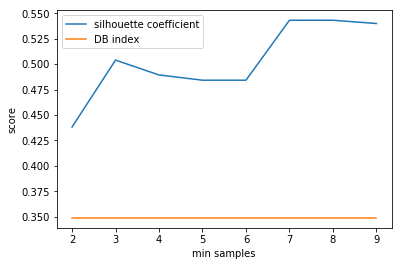

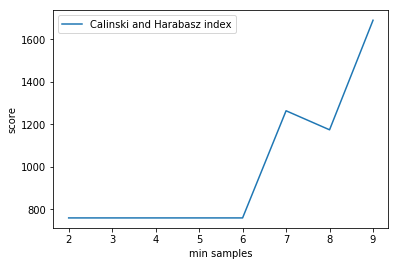

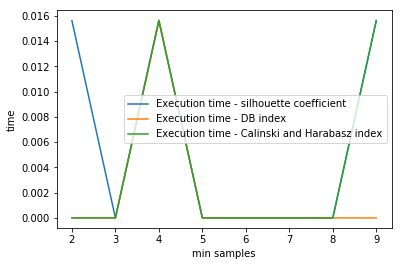

k with silhouette coefficient: 26
k with DB index: 8
k with Calinski and Harabasz index: 15


In [22]:
min_eps = 0.3
max_eps = 3.0
step_eps = 0.2

min_nb_samples = 2
max_nb_samples = 10

((minpts_sil,eps_sil,best_labels_sil),
 (minpts_db,eps_db,best_labels_db),
 (minpts_chi,eps_chi,best_labels_chi)) = dbscan_params(data[0],min_nb_samples,max_nb_samples,min_eps,max_eps,step_eps)

print("k with silhouette coefficient:",np.unique(best_labels_sil).shape[0])
print("k with DB index:",np.unique(best_labels_db).shape[0])
print("k with Calinski and Harabasz index:",np.unique(best_labels_chi).shape[0])

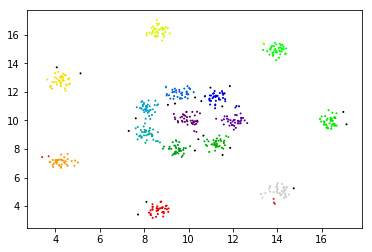

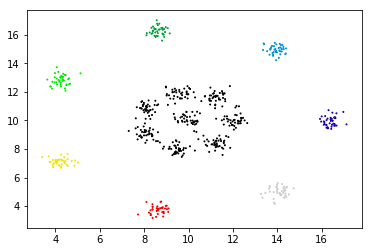

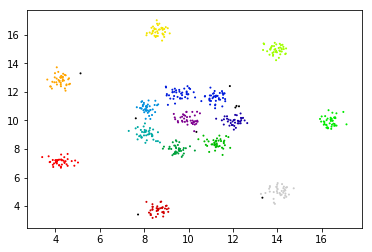

In [23]:
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')
plt.show()